# Pt vs Px/Py

In [8]:
%reset -f

import ROOT, numpy

ROOT.gErrorIgnoreLevel = ROOT.kWarning

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

ROOT.gStyle.SetPadRightMargin(0.01)
ROOT.gStyle.SetPadLeftMargin(0.075)
ROOT.gStyle.SetPadBottomMargin(0.12)

ROOT.gStyle.SetTitleFont(42,'xy')
ROOT.gStyle.SetTitleFont(42,'T')
ROOT.gStyle.SetTitleSize(0.075, 'XY')
ROOT.gStyle.SetTitleSize(0.1, 'T')
ROOT.gStyle.SetTitleOffset(0.8, 'X')
ROOT.gStyle.SetTitleOffset(0.58, 'Y')
ROOT.gStyle.SetLabelFont(42,'xy')
ROOT.gStyle.SetLabelSize(0.07, 'XY')

ROOT.gStyle.SetMarkerSize(2)
ROOT.TH1.AddDirectory(0)

%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py
%run -i load_data.py
%run -i eppi0_bsa.py


dfs = []
#for fname in ["data/lvl2_eppi0.inb.qa.ecorr.pcorr.root", "data/lvl2_eppi0.outb.qa.ecorr.pcorr.root"]:
#    for ist in [0,1]:
#        df = load_rdf(f"{fname}.{ist}.root")
#        dfs.append(df)


for fname in ["data/lvl2_eppi0.inb.qa.ecorr.pcorr.root", "data/lvl2_eppi0.outb.qa.ecorr.pcorr.root"]:
#    break
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)
    cut = "&&".join(f"(((int)status)&(1<<{i}))" for i in [ecloose,prodc,gloosest])
    cut += "&& abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4"
    cut += "&& thp<44.106+-6.625*pp+1.438*pp*pp"

    df = df.Filter(cut)
    for status in ["abs(dpt)<0.3", "abs(dpt)<0.424", "abs(dpx)<0.3 && abs(dpy)<0.3"]:
        rdf = df.Filter(status)
        rdf = define_eppi0_bins(rdf, fname)
        rdf = process_eppi0_bins(rdf, fname)
        dfs.append(rdf)

rdfs = [] 
for rdf in dfs:
    make_allbsas(rdf)
    rdfs.append(rdf)


In [9]:
def xshift(gr0, dx=0):
    for i in range(gr0.GetN()):
        gr0.SetPointX(i, gr0.GetPointX(i)+dx)
    return gr0

________________________________

### $dpt<0.3$ vs $dpt<0.424$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


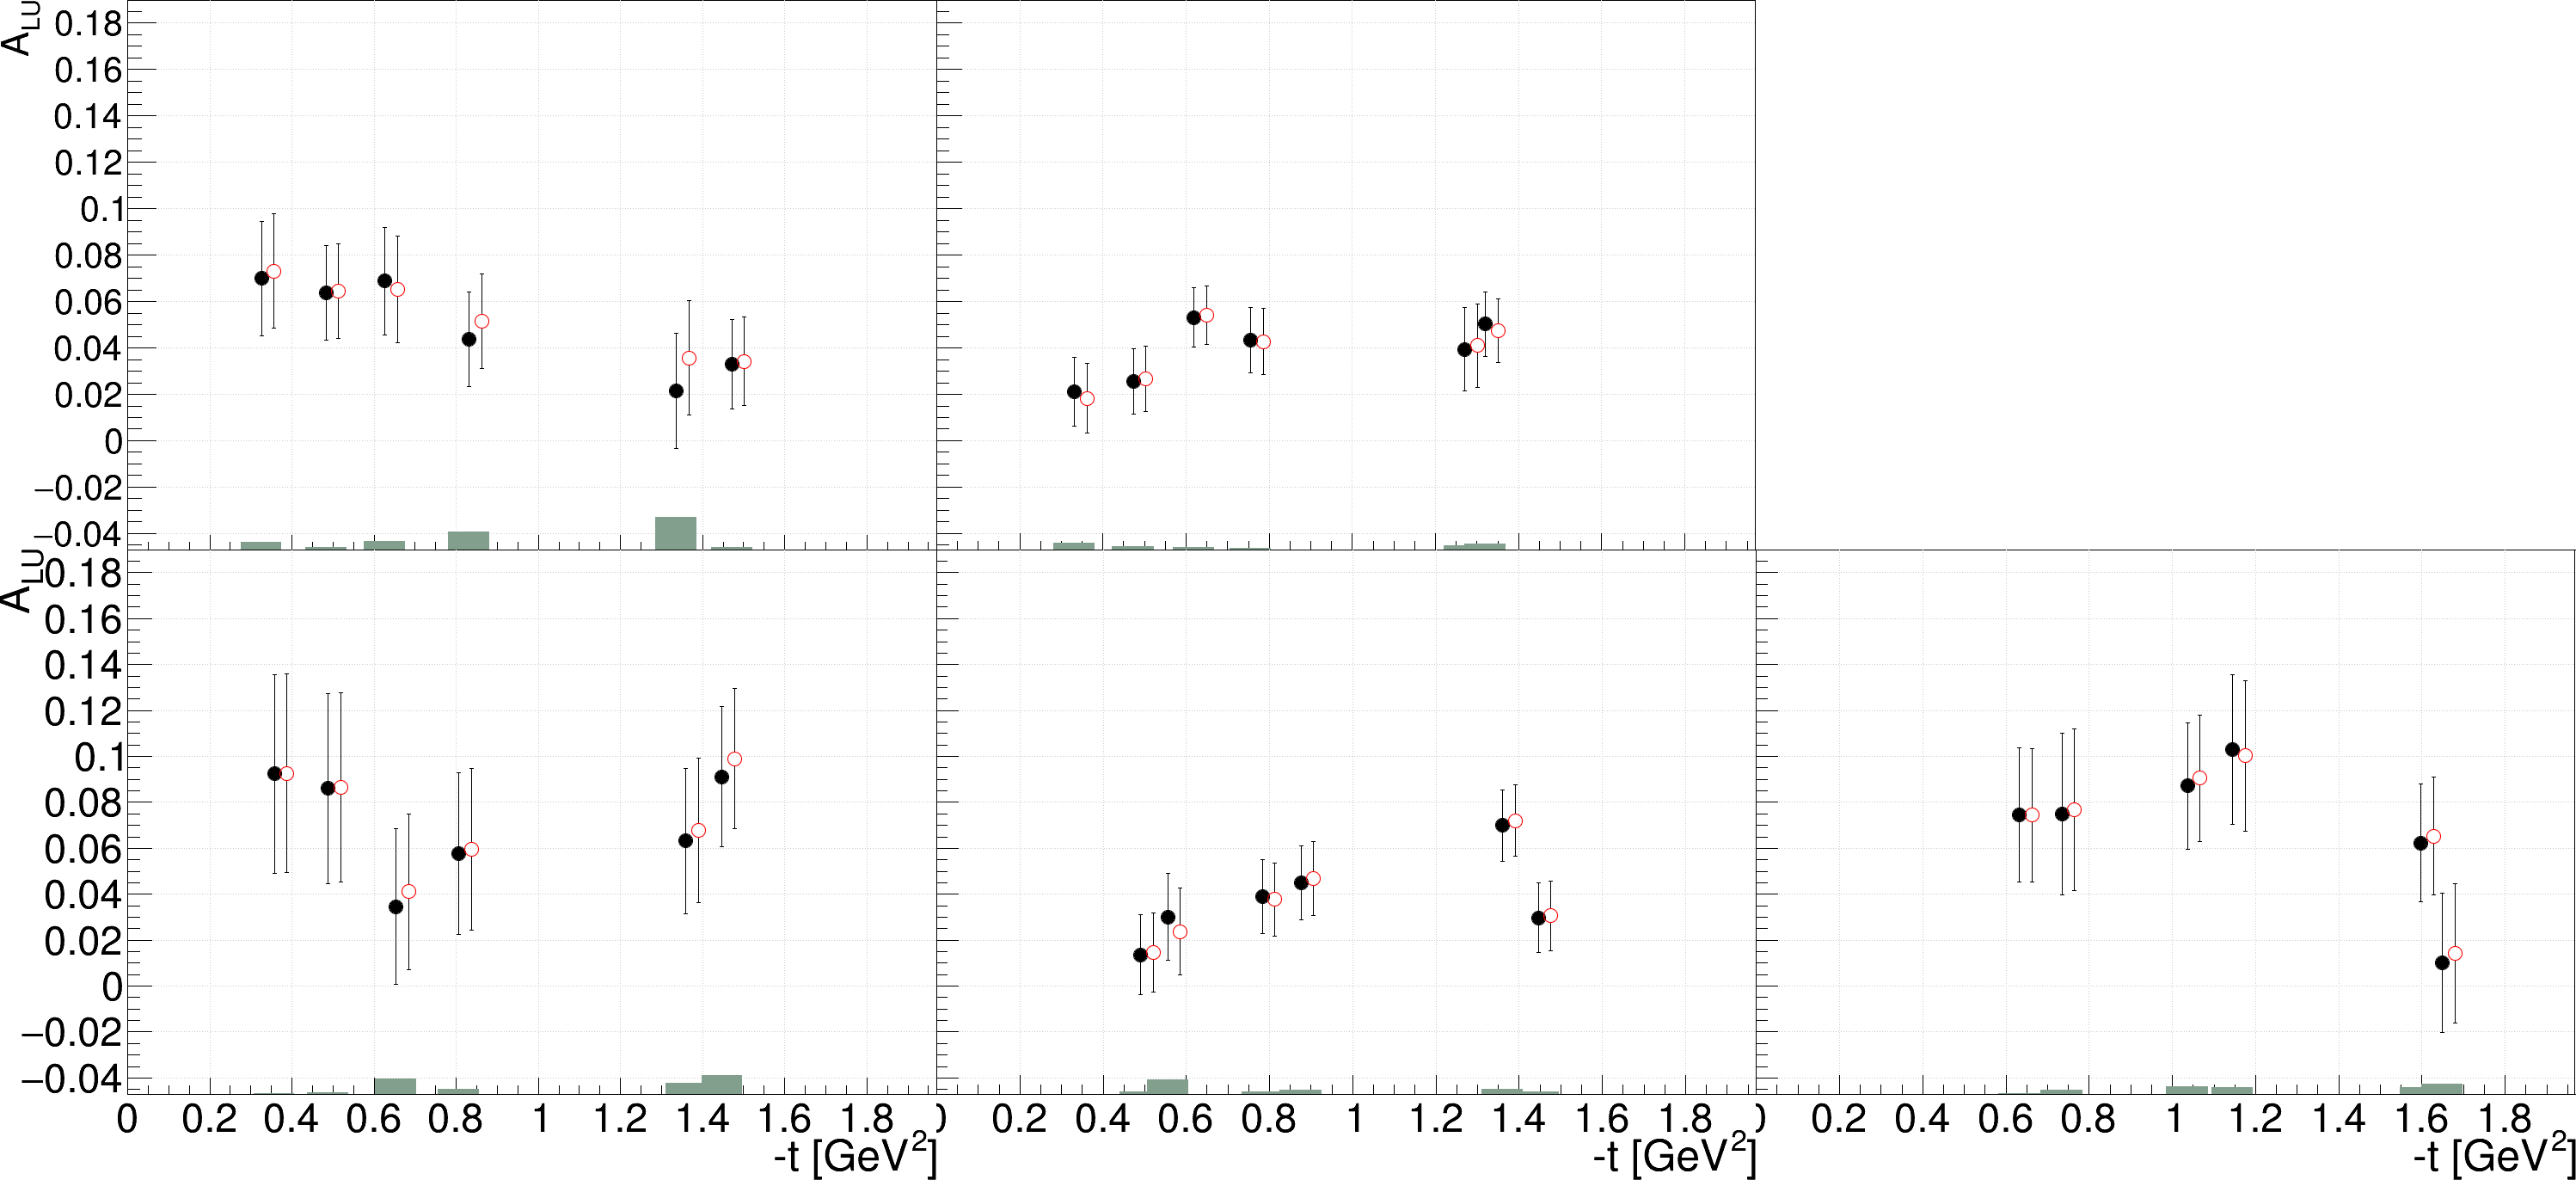

In [22]:
ROOT.gStyle.SetTitleOffset(0.96, 'Y')
ROOT.gStyle.SetPadLeftMargin(0.12)

httdfid = ROOT.TH1F("httfid","fiducial cuts systematics;#Delta_{syst}",200,0,0.052)

adf0,adf1,adf2,bdf0,bdf1,bdf2 = rdfs

c1 = ROOT.TCanvas("c1","c1",3000,1400)
c1.Draw()
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(3,2,0,0)

grs = []

ipad=0
for aqdf in adf0.qdfs:
    bid = aqdf.binid

    ipad += 2 if ipad==2 else 1
    if ipad==2: c1.cd(ipad).SetRightMargin(0.001)

    h1 = c1.cd(ipad).DrawFrame(0,-0.047,1.97,0.19)
    h1.SetTitle(";-t [GeV^{2}];A_{LU}");

    grsys = ROOT.TGraphErrors()
    agr0,agr1,agr2,bgr0,bgr1,bgr2 = [df.shards[bid].grp1.Clone() for df in rdfs]
    gra,grb = agr0, bgr0
    graX,grbX = xshift(agr1, 0.03), xshift(bgr1, 0.03)
    
    for i in range(3):
        httdfid.Fill(abs(gra.GetPointY(i)-graX.GetPointY(i)))
        httdfid.Fill(abs(grb.GetPointY(i)-grbX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), gra.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(gra.GetPointY(i)-graX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), grb.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(grb.GetPointY(i)-grbX.GetPointY(i)))

    gra.Draw("P")
    grb.Draw("P")

    graX.Draw("P")
    grbX.Draw("P")

    gra.SetMarkerStyle(20)
    grb.SetMarkerStyle(20)
    graX.SetMarkerStyle(24)
    grbX.SetMarkerStyle(24)
    graX.SetMarkerColor(2)
    grbX.SetMarkerColor(2)
    
    grsys.SetFillColor(32)
    grsys.Draw("2")
    grs.append(grsys)


________________________________

### $dpt<0.3$ vs $|dpxy|<0.3$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


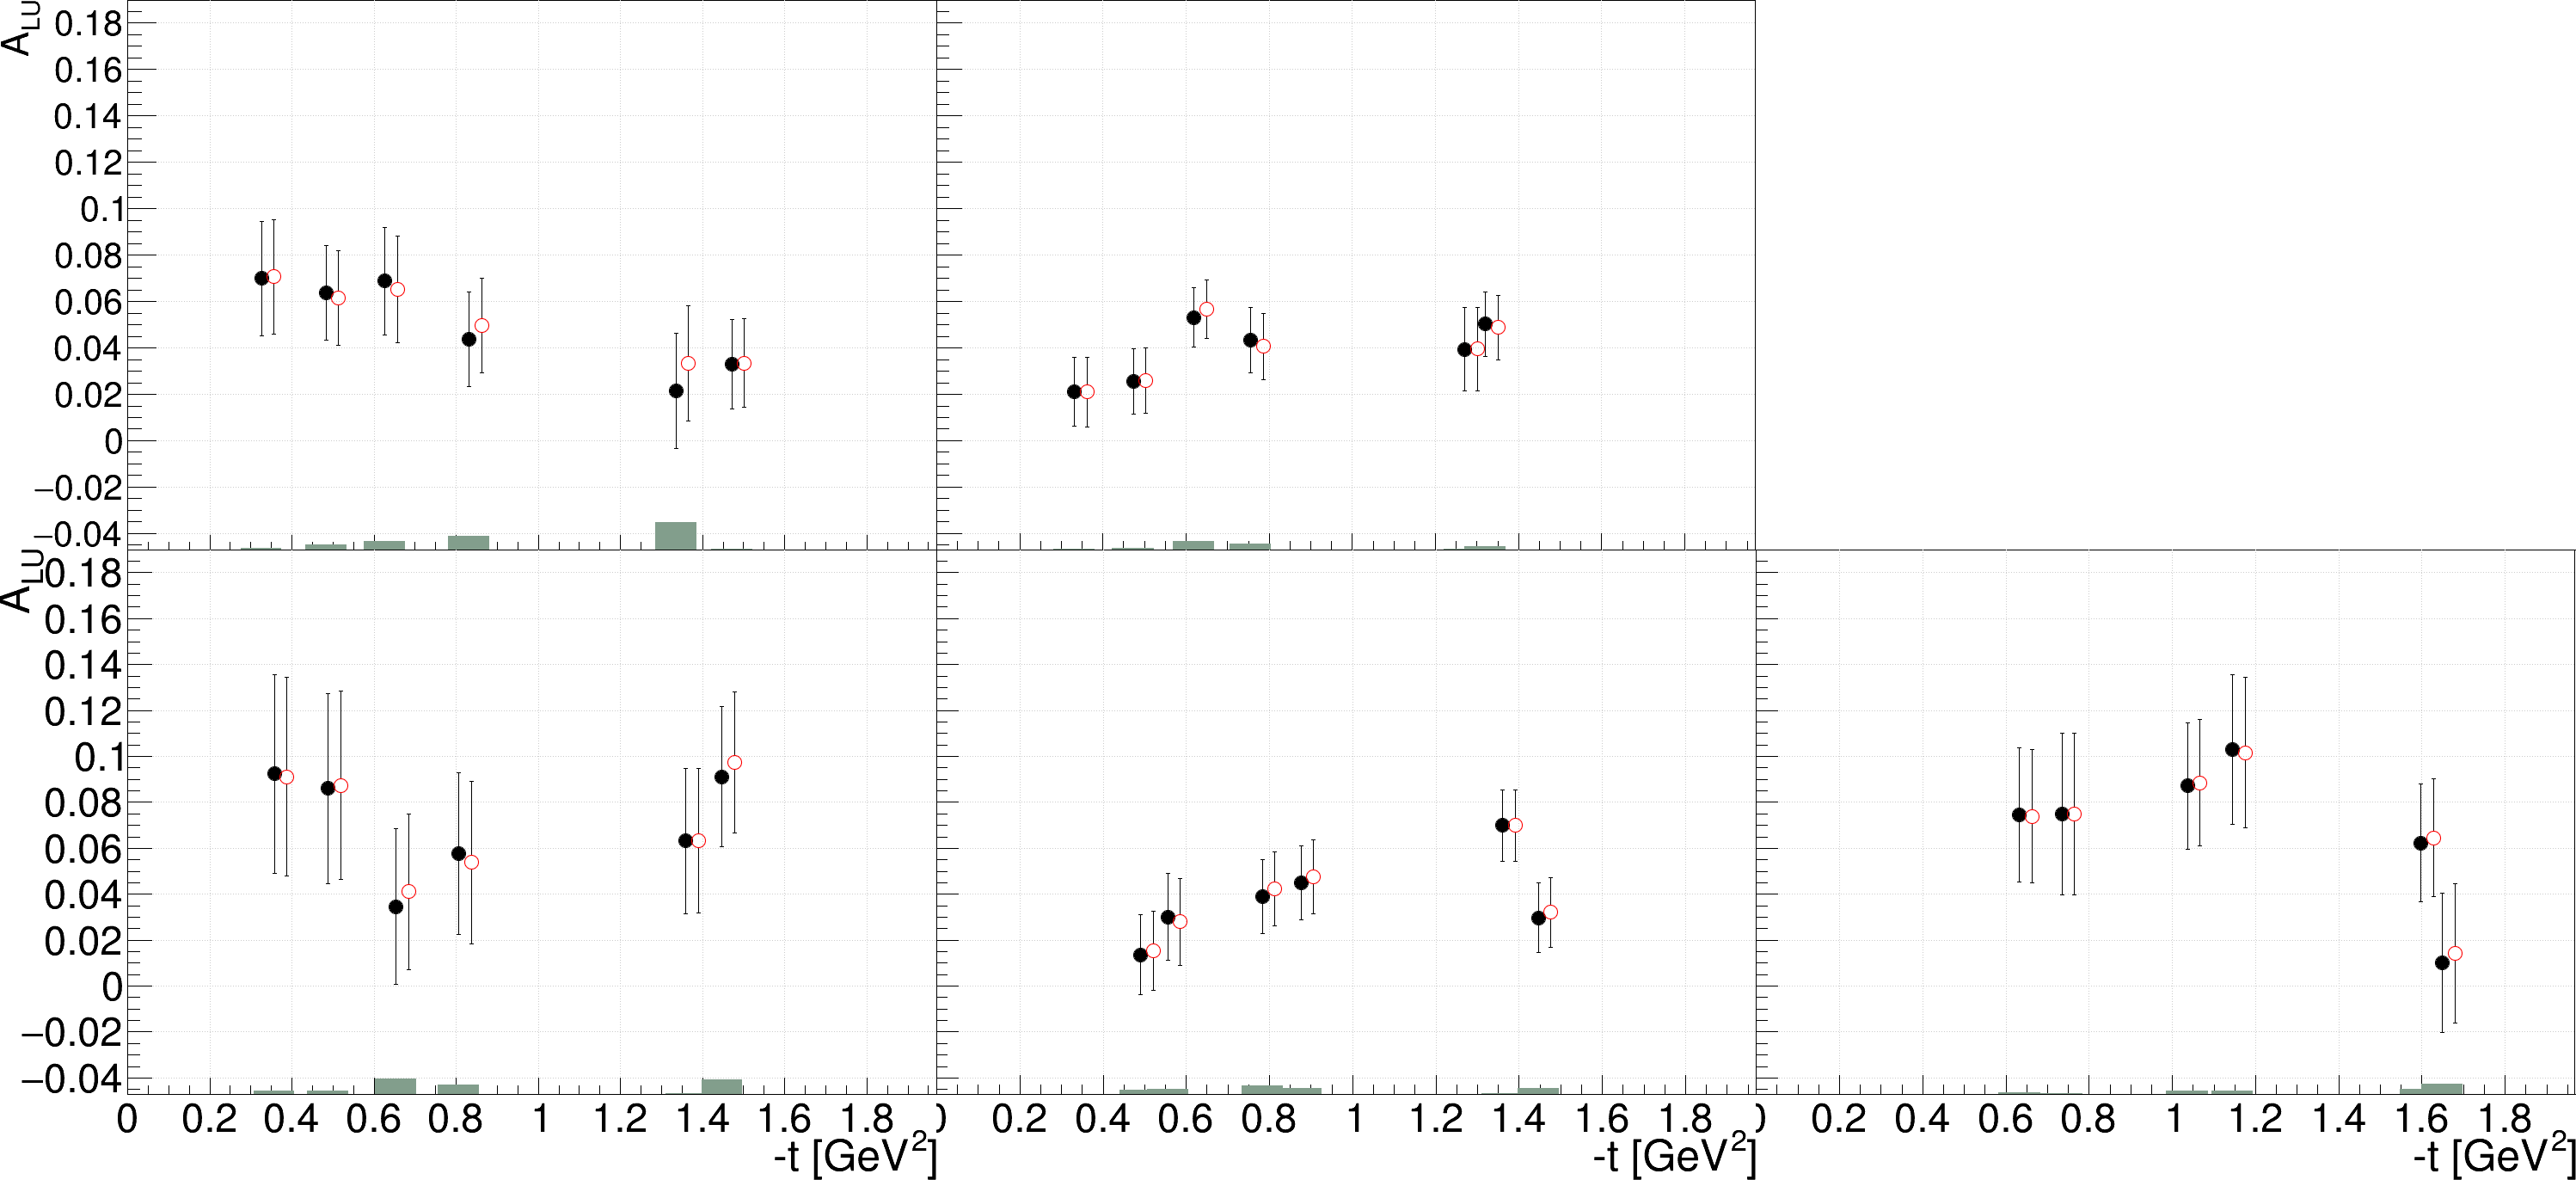

In [21]:
ROOT.gStyle.SetTitleOffset(0.96, 'Y')
ROOT.gStyle.SetPadLeftMargin(0.12)

httdfid = ROOT.TH1F("httfid","fiducial cuts systematics;#Delta_{syst}",200,0,0.052)

adf0,adf1,adf2,bdf0,bdf1,bdf2 = rdfs

c1 = ROOT.TCanvas("c1","c1",3000,1400)
c1.Draw()
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(3,2,0,0)

grs = []

ipad=0
for aqdf in adf0.qdfs:
    bid = aqdf.binid

    ipad += 2 if ipad==2 else 1
    if ipad==2: c1.cd(ipad).SetRightMargin(0.001)

    h1 = c1.cd(ipad).DrawFrame(0,-0.047,1.97,0.19)
    h1.SetTitle(";-t [GeV^{2}];A_{LU}");

    grsys = ROOT.TGraphErrors()
    agr0,agr1,agr2,bgr0,bgr1,bgr2 = [df.shards[bid].grp1.Clone() for df in rdfs]
    gra,grb = agr0, bgr0
    graX,grbX = xshift(agr2, 0.03), xshift(bgr2, 0.03)
    
    for i in range(3):
        httdfid.Fill(abs(gra.GetPointY(i)-graX.GetPointY(i)))
        httdfid.Fill(abs(grb.GetPointY(i)-grbX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), gra.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(gra.GetPointY(i)-graX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), grb.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(grb.GetPointY(i)-grbX.GetPointY(i)))

    gra.Draw("P")
    grb.Draw("P")

    graX.Draw("P")
    grbX.Draw("P")

    gra.SetMarkerStyle(20)
    grb.SetMarkerStyle(20)
    graX.SetMarkerStyle(24)
    grbX.SetMarkerStyle(24)
    graX.SetMarkerColor(2)
    grbX.SetMarkerColor(2)
    
    grsys.SetFillColor(32)
    grsys.Draw("2")
    grs.append(grsys)


________________________________

### $dpt<0.424$ vs $|dpxy|<0.3$

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


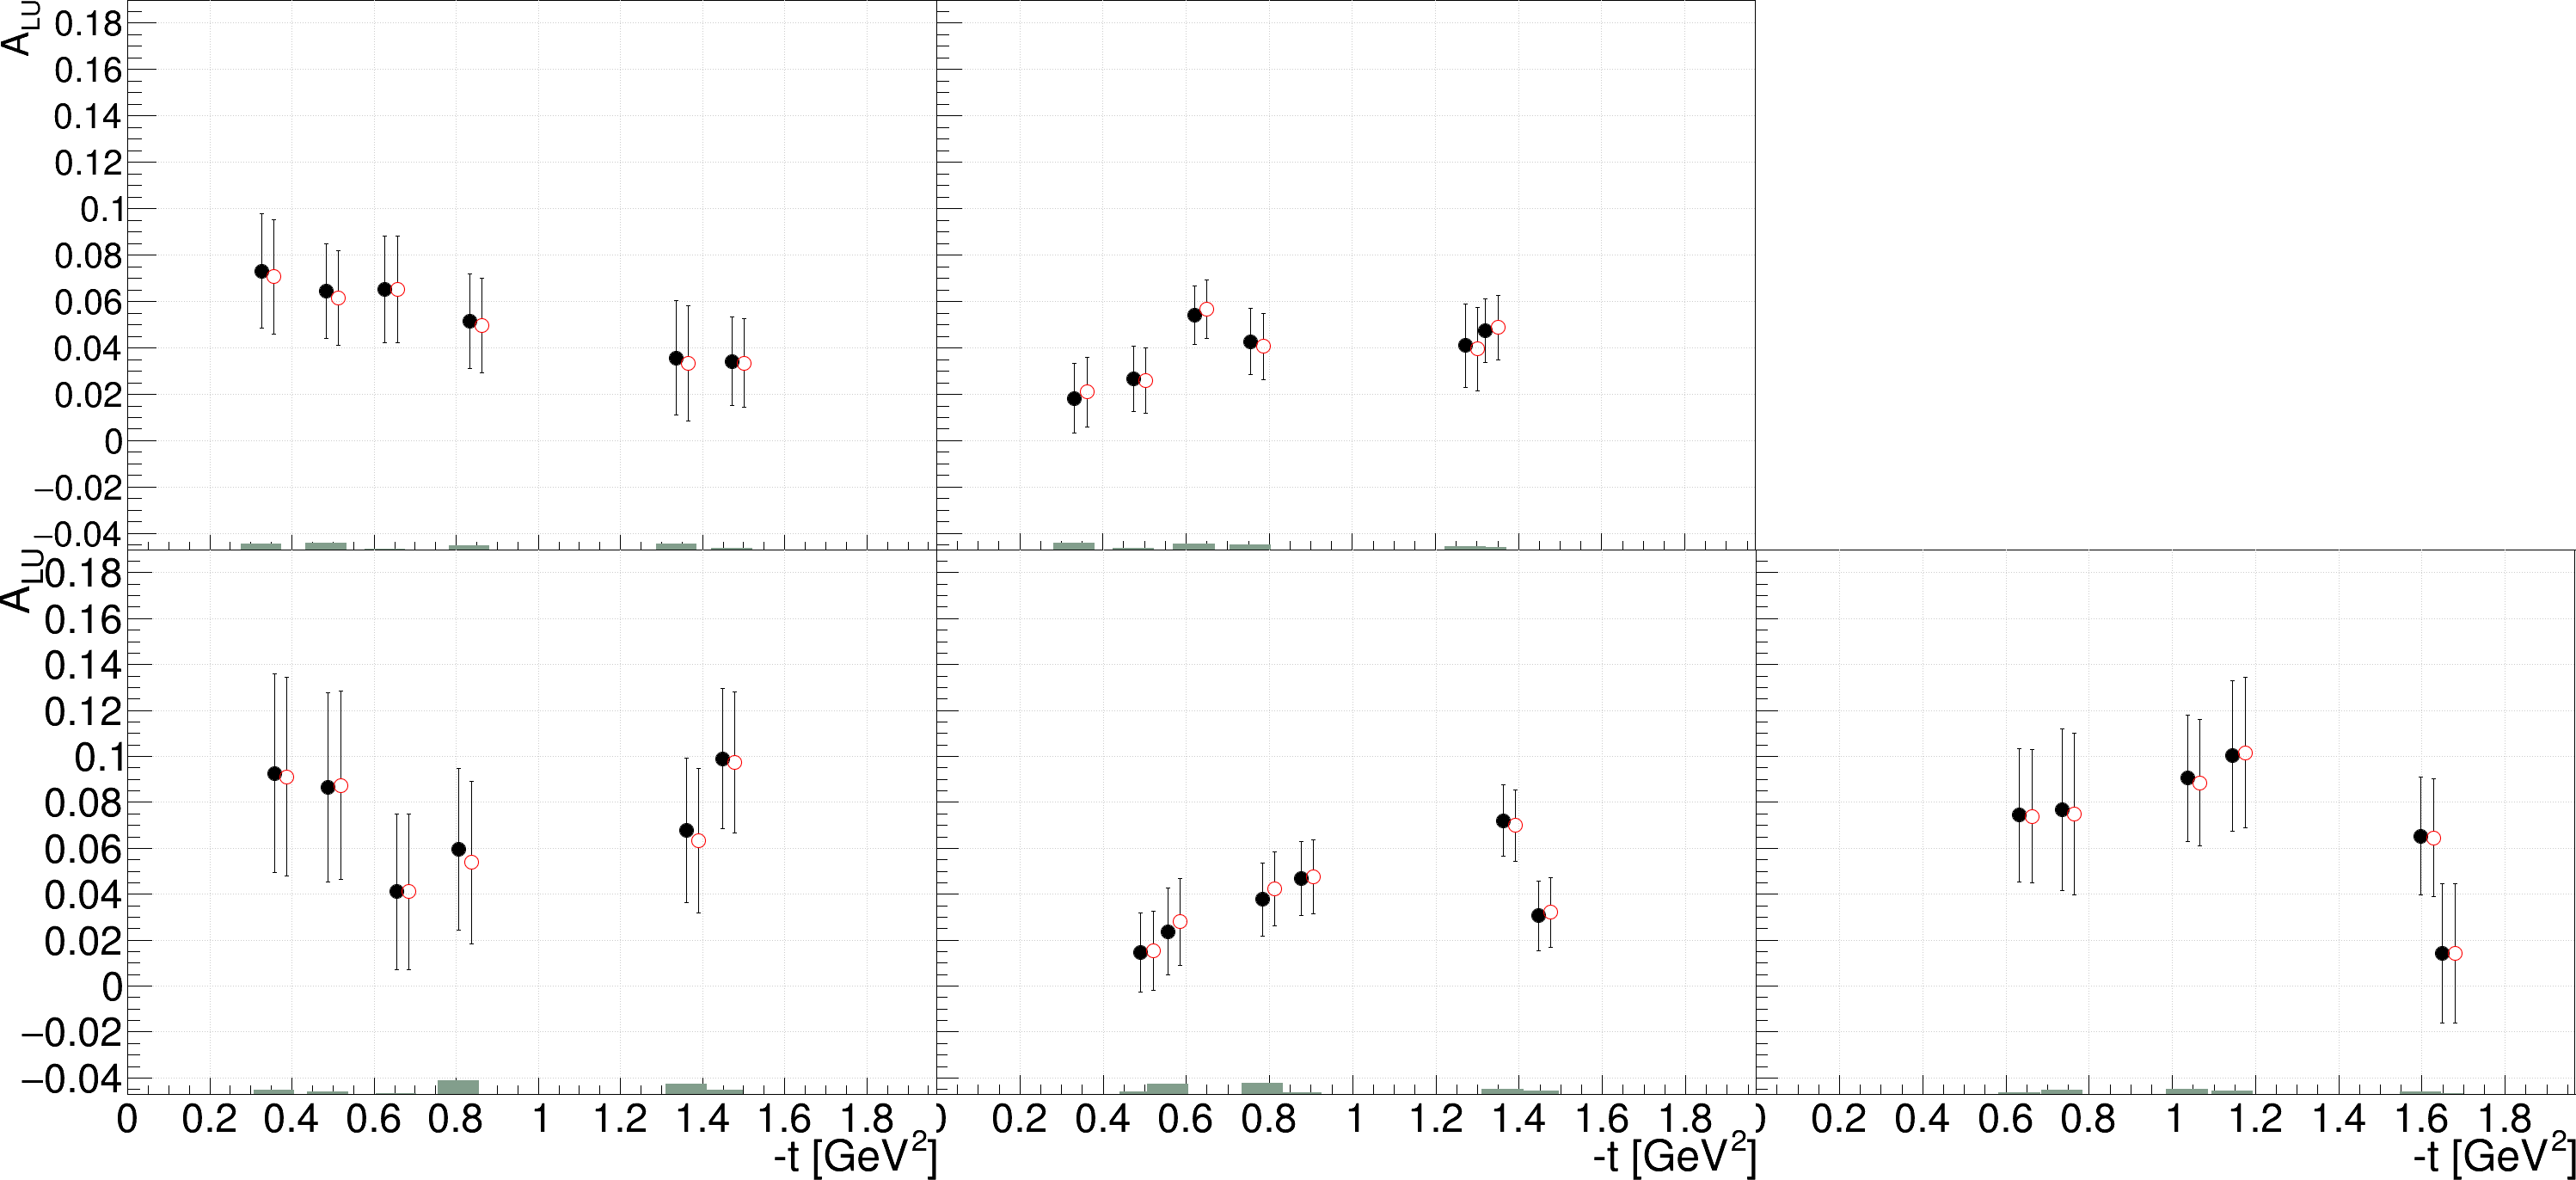

In [23]:
ROOT.gStyle.SetTitleOffset(0.96, 'Y')
ROOT.gStyle.SetPadLeftMargin(0.12)

httdfid = ROOT.TH1F("httfid","fiducial cuts systematics;#Delta_{syst}",200,0,0.052)

adf0,adf1,adf2,bdf0,bdf1,bdf2 = rdfs

c1 = ROOT.TCanvas("c1","c1",3000,1400)
c1.Draw()
c1.SetTopMargin(0)
c1.SetRightMargin(0)
c1.Divide(3,2,0,0)

grs = []

ipad=0
for aqdf in adf0.qdfs:
    bid = aqdf.binid

    ipad += 2 if ipad==2 else 1
    if ipad==2: c1.cd(ipad).SetRightMargin(0.001)

    h1 = c1.cd(ipad).DrawFrame(0,-0.047,1.97,0.19)
    h1.SetTitle(";-t [GeV^{2}];A_{LU}");

    grsys = ROOT.TGraphErrors()
    agr0,agr1,agr2,bgr0,bgr1,bgr2 = [df.shards[bid].grp1.Clone() for df in rdfs]
    gra,grb = agr1, bgr1
    graX,grbX = xshift(agr2, 0.03), xshift(bgr2, 0.03)
    
    for i in range(3):
        httdfid.Fill(abs(gra.GetPointY(i)-graX.GetPointY(i)))
        httdfid.Fill(abs(grb.GetPointY(i)-grbX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), gra.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(gra.GetPointY(i)-graX.GetPointY(i)))
        grsys.SetPoint(grsys.GetN(), grb.GetPointX(i), -0.047)
        grsys.SetPointError(grsys.GetN()-1, 0.05, abs(grb.GetPointY(i)-grbX.GetPointY(i)))

    gra.Draw("P")
    grb.Draw("P")

    graX.Draw("P")
    grbX.Draw("P")

    gra.SetMarkerStyle(20)
    grb.SetMarkerStyle(20)
    graX.SetMarkerStyle(24)
    grbX.SetMarkerStyle(24)
    graX.SetMarkerColor(2)
    grbX.SetMarkerColor(2)
    
    grsys.SetFillColor(32)
    grsys.Draw("2")
    grs.append(grsys)


________________________________

## 1D distributions

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


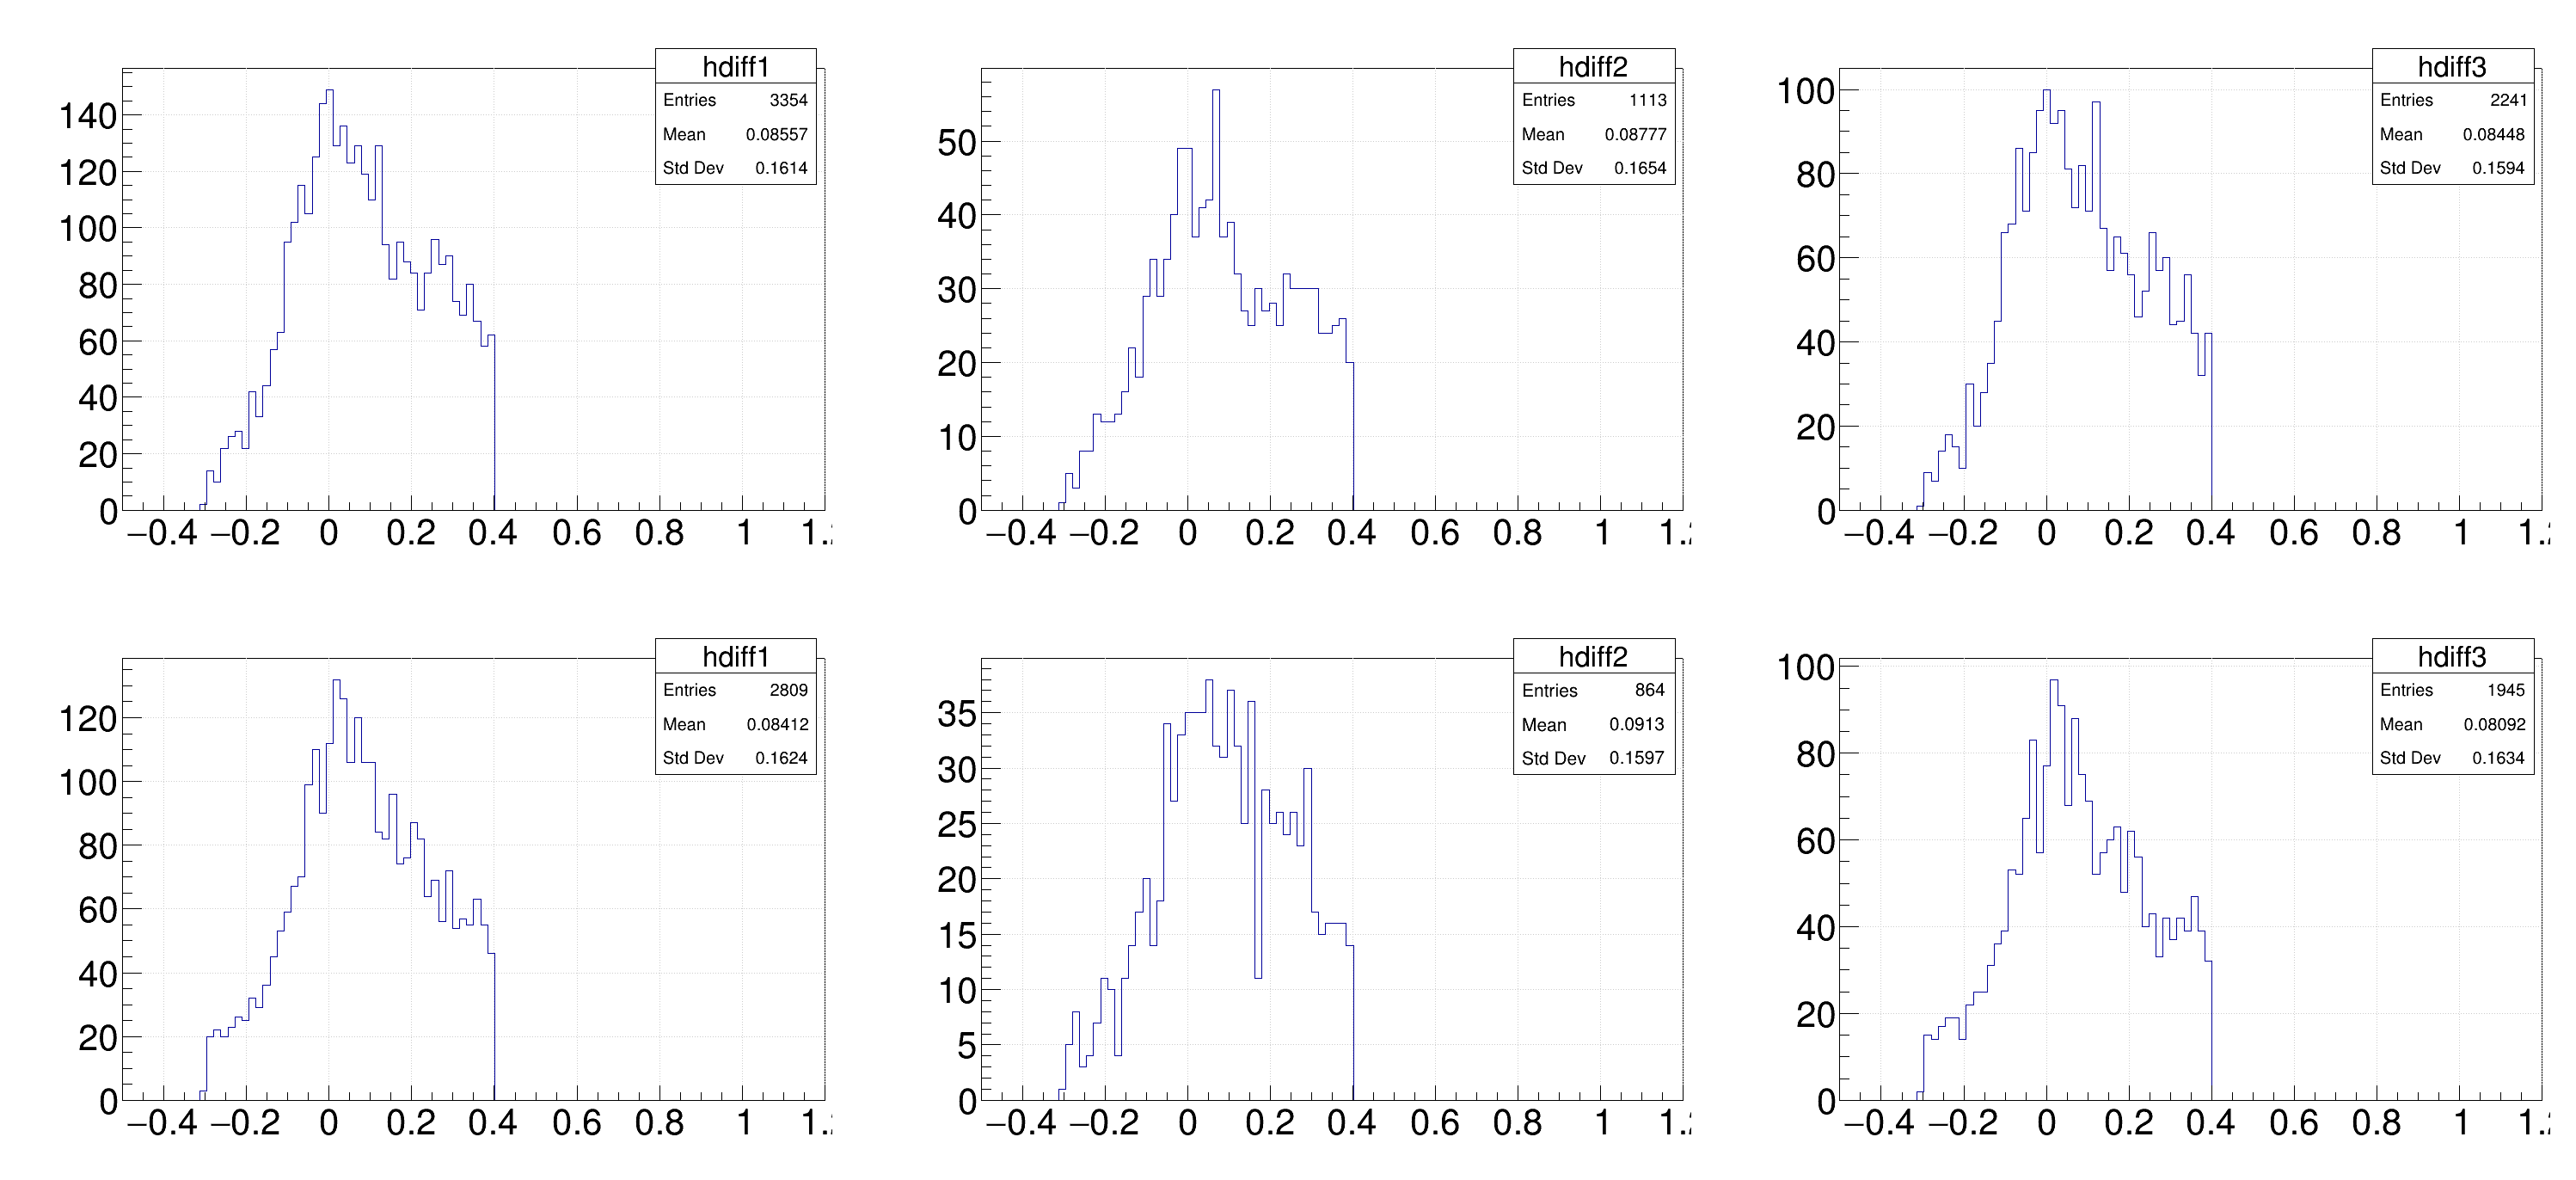

In [32]:
c1 = ROOT.TCanvas("c1","c1",3000,1400)
c1.Divide(3,2)
c1.Draw()

ROOT.gStyle.SetOptStat(1)

adf0,adf1,adf2,bdf0,bdf1,bdf2 = rdfs

ipad,h1s = 0,[]
for df in [adf1, bdf1]:
    h1 = df.Filter("abs(dpt)>0.3 && abs(dpt)<0.424").Histo1D(("hdiff1","",100,-0.5,1.2), "mm2")
    h2 = df.Filter("(dpx>0.3 || dpy>0.3) && abs(dpt)<0.424").Histo1D(("hdiff2","",100,-0.5,1.2), "mm2")
    h3 = df.Filter("(dpx<0.3 && dpy<0.3) && abs(dpt)>0.3").Histo1D(("hdiff3","",100,-0.5,1.2), "mm2")
    
    h1s.append([h1,h2,h3])
    for hh in h1s[-1]:
        ipad+=1
        c1.cd(ipad)
        hh.Draw()


________________________________

________________________________

________________________________

________________________________
________________________________
________________________________